In [1]:
#coding=utf-8
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.layers import Input,Dense,BatchNormalization,Conv2D,MaxPooling2D,AveragePooling2D,ZeroPadding2D
from tensorflow.python.keras.layers import add,Flatten
from tensorflow.python.keras.backend import squeeze
# from tensorflow.python.keras.optimizers import Adam
#from keras.layers.convolutional import Conv2D,MaxPooling2D,AveragePooling2D
# from tensorflow.python.keras.optimizers import SGD
import numpy as np
import os
# os.environ["CUDA_VISIBLE_DEVICES"] = ""  
def Conv2d_BN(x, nb_filter,kernel_size, strides=(1,1), padding='same',name=None):
    if name is not None:
        bn_name = name + '_bn'
        conv_name = name + '_conv'
    else:
        bn_name = None
        conv_name = None
 
    x = Conv2D(nb_filter,kernel_size,padding=padding,strides=strides,activation='relu',name=conv_name)(x)
    x = BatchNormalization(axis=3,name=bn_name)(x)
    return x
 
def Conv_Block(inpt,nb_filter,kernel_size,strides=(1,1), with_conv_shortcut=False):
    x = Conv2d_BN(inpt,nb_filter=nb_filter[0],kernel_size=(1,1),strides=strides,padding='same')
    x = Conv2d_BN(x, nb_filter=nb_filter[1], kernel_size=(3,3), padding='same')
    x = Conv2d_BN(x, nb_filter=nb_filter[2], kernel_size=(1,1), padding='same')
    if with_conv_shortcut:
        shortcut = Conv2d_BN(inpt,nb_filter=nb_filter[2],strides=strides,kernel_size=kernel_size)
        x = add([x,shortcut])
        return x
    else:
        x = add([x,inpt])
        return x
 
inpt = Input(shape=(256,256,1))
x=inpt
# x = ZeroPadding2D((3,3))(inpt)
x = Conv2d_BN(x,nb_filter=64,kernel_size=(7,7),strides=(2,2),padding='valid')
x = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(x)
 
 
x = Conv_Block(x,nb_filter=[64,64,256],kernel_size=(3,3),strides=(1,1),with_conv_shortcut=True)
x = Conv_Block(x,nb_filter=[64,64,256],kernel_size=(3,3))
x = Conv_Block(x,nb_filter=[64,64,256],kernel_size=(3,3))
 
x = Conv_Block(x,nb_filter=[128,128,512],kernel_size=(3,3),strides=(2,2),with_conv_shortcut=True)
x = Conv_Block(x,nb_filter=[128,128,512],kernel_size=(3,3))
x = Conv_Block(x,nb_filter=[128,128,512],kernel_size=(3,3))
x = Conv_Block(x,nb_filter=[128,128,512],kernel_size=(3,3))
 
x = Conv_Block(x,nb_filter=[256,256,1024],kernel_size=(3,3),strides=(2,2),with_conv_shortcut=True)
x = Conv_Block(x,nb_filter=[256,256,1024],kernel_size=(3,3))
x = Conv_Block(x,nb_filter=[256,256,1024],kernel_size=(3,3))
x = Conv_Block(x,nb_filter=[256,256,1024],kernel_size=(3,3))
x = Conv_Block(x,nb_filter=[256,256,1024],kernel_size=(3,3))
x = Conv_Block(x,nb_filter=[256,256,1024],kernel_size=(3,3))
 
x = Conv_Block(x,nb_filter=[512,512,2048],kernel_size=(3,3),strides=(2,2),with_conv_shortcut=True)
x = Conv_Block(x,nb_filter=[512,512,2048],kernel_size=(3,3))
x = Conv_Block(x,nb_filter=[512,512,2048],kernel_size=(3,3))
x = Dense(1,activation='sigmoid')(x)
model = Model(inputs=inpt,outputs=x)
# sgd = SGD(decay=0.0001,momentum=0.9)
# adam=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_squared_error'])
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 125, 125, 64) 3200        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 125, 125, 64) 256         conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 63, 63, 64)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [2]:
data=np.load('rain_data.npy')
data=np.expand_dims(data,axis=-1)
rain=np.load('label.npy')
# rain=np.expand_dims(rain,axis=-1)
print(data.shape,rain.shape)

(1000, 256, 256, 1) (1000, 8, 8)


In [3]:
train_x=data[:-100]
test_x=data[-100:]
train_y=rain[:-100]
test_y=rain[-100:]

In [4]:
NUM_EPOCHS=500
BATCH_SIZE=64
print(train_x.shape,test_x.shape,train_y.shape,test_y.shape)

(900, 256, 256, 1) (100, 256, 256, 1) (900, 8, 8) (100, 8, 8)


In [5]:
history=model.fit(train_x, train_y, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, validation_data=(test_x, test_y),shuffle=True)
model.save('Pre_ResNet50_1000_500.h5')


Epoch 1/500
15/15 [==============================] - 24s 428ms/step - loss: 0.1918 - mean_squared_error: 0.1918 - val_loss: 0.3277 - val_mean_squared_error: 0.3277
Epoch 2/500
15/15 [==============================] - 4s 240ms/step - loss: 0.1680 - mean_squared_error: 0.1680 - val_loss: 0.3284 - val_mean_squared_error: 0.3284
Epoch 3/500
15/15 [==============================] - 4s 240ms/step - loss: 0.1259 - mean_squared_error: 0.1259 - val_loss: 0.3290 - val_mean_squared_error: 0.3290
Epoch 4/500
15/15 [==============================] - 4s 241ms/step - loss: 0.0747 - mean_squared_error: 0.0747 - val_loss: 0.3286 - val_mean_squared_error: 0.3286
Epoch 5/500
15/15 [==============================] - 4s 241ms/step - loss: 0.0470 - mean_squared_error: 0.0470 - val_loss: 0.3263 - val_mean_squared_error: 0.3263
Epoch 6/500
15/15 [==============================] - 4s 241ms/step - loss: 0.0350 - mean_squared_error: 0.0350 - val_loss: 0.3284 - val_mean_squared_error: 0.3284
Epoch 7/500
15/15 [==

15/15 [==============================] - 4s 241ms/step - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0902 - val_mean_squared_error: 0.0902
Epoch 52/500
15/15 [==============================] - 4s 241ms/step - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.1272 - val_mean_squared_error: 0.1272
Epoch 53/500
15/15 [==============================] - 4s 241ms/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0409 - val_mean_squared_error: 0.0409
Epoch 54/500
15/15 [==============================] - 4s 241ms/step - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0550 - val_mean_squared_error: 0.0550
Epoch 55/500
15/15 [==============================] - 4s 241ms/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0760 - val_mean_squared_error: 0.0760
Epoch 56/500
15/15 [==============================] - 4s 241ms/step - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0788 - val_mean_squared_error: 0.0788
Epoch 57/500
15/15 [=========

15/15 [==============================] - 4s 241ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0656 - val_mean_squared_error: 0.0656
Epoch 102/500
15/15 [==============================] - 4s 241ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0331 - val_mean_squared_error: 0.0331
Epoch 103/500
15/15 [==============================] - 4s 241ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0278 - val_mean_squared_error: 0.0278
Epoch 104/500
15/15 [==============================] - 4s 241ms/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0404 - val_mean_squared_error: 0.0404
Epoch 105/500
15/15 [==============================] - 4s 241ms/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.3291 - val_mean_squared_error: 0.3291
Epoch 106/500
15/15 [==============================] - 4s 241ms/step - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.3280 - val_mean_squared_error: 0.3280
Epoch 107/500
15/15 [===

Epoch 151/500
15/15 [==============================] - 4s 241ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.3142 - val_mean_squared_error: 0.3142
Epoch 152/500
15/15 [==============================] - 4s 241ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.3554 - val_mean_squared_error: 0.3554
Epoch 153/500
15/15 [==============================] - 4s 241ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.3439 - val_mean_squared_error: 0.3439
Epoch 154/500
15/15 [==============================] - 4s 242ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.3020 - val_mean_squared_error: 0.3020
Epoch 155/500
15/15 [==============================] - 4s 241ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.2827 - val_mean_squared_error: 0.2827
Epoch 156/500
15/15 [==============================] - 4s 241ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0366 - val_mean_squared_error: 0.0366
Epoch 157/

Epoch 201/500
15/15 [==============================] - 4s 241ms/step - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.1118 - val_mean_squared_error: 0.1118
Epoch 202/500
15/15 [==============================] - 4s 241ms/step - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0982 - val_mean_squared_error: 0.0982
Epoch 203/500
15/15 [==============================] - 4s 241ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0852 - val_mean_squared_error: 0.0852
Epoch 204/500
15/15 [==============================] - 4s 241ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0935 - val_mean_squared_error: 0.0935
Epoch 205/500
15/15 [==============================] - 4s 241ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.1284 - val_mean_squared_error: 0.1284
Epoch 206/500
15/15 [==============================] - 4s 241ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.1363 - val_mean_squared_error: 0.1363
Epoch 207/

Epoch 251/500
15/15 [==============================] - 4s 241ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0451 - val_mean_squared_error: 0.0451
Epoch 252/500
15/15 [==============================] - 4s 241ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0339 - val_mean_squared_error: 0.0339
Epoch 253/500
15/15 [==============================] - 4s 241ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0348 - val_mean_squared_error: 0.0348
Epoch 254/500
15/15 [==============================] - 4s 241ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.1211 - val_mean_squared_error: 0.1211
Epoch 255/500
15/15 [==============================] - 4s 241ms/step - loss: 0.0220 - mean_squared_error: 0.0220 - val_loss: 0.0917 - val_mean_squared_error: 0.0917
Epoch 256/500
15/15 [==============================] - 4s 241ms/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0973 - val_mean_squared_error: 0.0973
Epoch 257/

Epoch 301/500
15/15 [==============================] - 4s 241ms/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.2176 - val_mean_squared_error: 0.2176
Epoch 302/500
15/15 [==============================] - 4s 241ms/step - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.1864 - val_mean_squared_error: 0.1864
Epoch 303/500
15/15 [==============================] - 4s 241ms/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.1433 - val_mean_squared_error: 0.1433
Epoch 304/500
15/15 [==============================] - 4s 241ms/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.1815 - val_mean_squared_error: 0.1815
Epoch 305/500
15/15 [==============================] - 4s 241ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0921 - val_mean_squared_error: 0.0921
Epoch 306/500
15/15 [==============================] - 4s 241ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0661 - val_mean_squared_error: 0.0661
Epoch 307/

Epoch 351/500
15/15 [==============================] - 4s 241ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0378 - val_mean_squared_error: 0.0378
Epoch 352/500
15/15 [==============================] - 4s 241ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0380 - val_mean_squared_error: 0.0380
Epoch 353/500
15/15 [==============================] - 4s 241ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0373 - val_mean_squared_error: 0.0373
Epoch 354/500
15/15 [==============================] - 4s 241ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0380 - val_mean_squared_error: 0.0380
Epoch 355/500
15/15 [==============================] - 4s 241ms/step - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 356/500
15/15 [==============================] - 4s 241ms/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0431 - val_mean_squared_error: 0.0431
Epoch 357/

15/15 [==============================] - 4s 241ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0552 - val_mean_squared_error: 0.0552
Epoch 450/500
15/15 [==============================] - 4s 241ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0597 - val_mean_squared_error: 0.0597
Epoch 451/500
15/15 [==============================] - 4s 241ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0339 - val_mean_squared_error: 0.0339
Epoch 452/500
15/15 [==============================] - 4s 241ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0358 - val_mean_squared_error: 0.0358
Epoch 453/500
15/15 [==============================] - 4s 241ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0341 - val_mean_squared_error: 0.0341
Epoch 454/500
15/15 [==============================] - 4s 241ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0420 - val_mean_squared_error: 0.0420
Epoch 455/500
15/15 [===

/home/chase/.local/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [6]:

loss, acc = model.evaluate(test_x, test_y, batch_size=BATCH_SIZE)


2/2 [==============================] - 0s 46ms/step - loss: 0.0422 - mean_squared_error: 0.0422


In [7]:
print("\nAcc: {:.3f}".format(acc))
print(history.history.keys())
loss = history.history['loss']
mean_squared_error = history.history['mean_squared_error']
val_loss = history.history['val_loss']
val_mean_squared_error = history.history['val_mean_squared_error']

import pickle
 
with open('Pre_Resnet50_500.txt', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)


Acc: 0.042
dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


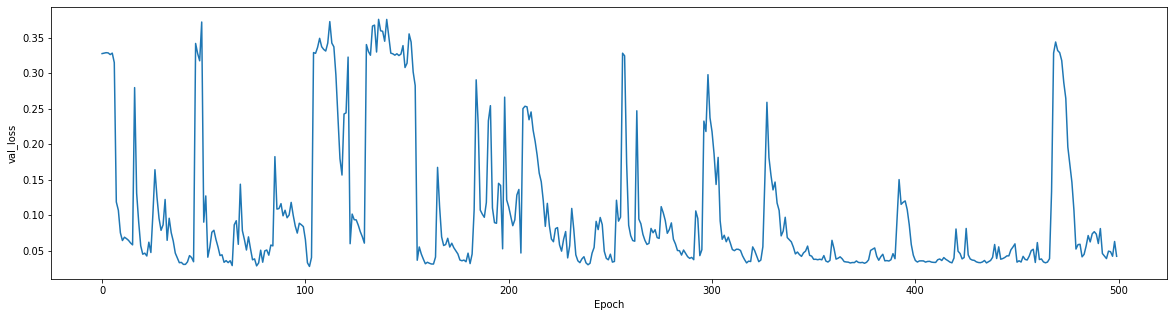

In [8]:
# model.save('ResNet50_1000_50.h5')
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.xlabel('Epoch')
plt.ylabel('val_loss')
plt.plot([i for i in range(len(val_loss))],val_loss)

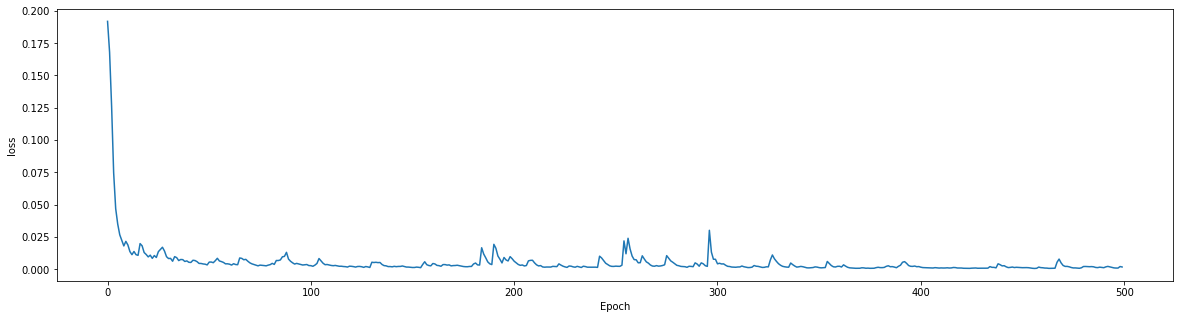

In [9]:
plt.figure(figsize=(20,5))
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.plot([i for i in range(len(loss))],loss)

In [10]:
from tensorflow.python.keras.models import load_model
model=load_model('Pre_ResNet50_1000_200.h5')

Epoch 1/500
15/15 [==============================] - 6s 276ms/step - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.3374 - val_mean_squared_error: 0.3374
Epoch 2/500
15/15 [==============================] - 4s 241ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.3318 - val_mean_squared_error: 0.3318
Epoch 3/500
15/15 [==============================] - 4s 241ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.3352 - val_mean_squared_error: 0.3352
Epoch 4/500
15/15 [==============================] - 4s 241ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.2847 - val_mean_squared_error: 0.2847
Epoch 5/500
15/15 [==============================] - 4s 241ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.2375 - val_mean_squared_error: 0.2375
Epoch 6/500
15/15 [==============================] - 4s 241ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.1856 - val_mean_squared_error: 0.1856
Epoch 7/500
15/15 [===

KeyboardInterrupt: 